In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

from rayopt import system_from_text, Analysis, FiniteConjugate, GaussianTrace

np.set_printoptions(precision=3)

Populating the interactive namespace from numpy and matplotlib


In [2]:
description = "oslo cooke triplet example 50mm f/4 20deg"
columns = "type roc distance radius material"
text = """
O 0       0     .364 AIR
S 21.25   5     6.5  SK16
S -158.65 2     6.5  AIR
S -20.25  6     5    F4
S 19.3    1     5    AIR
A 0       0     4.75 AIR
S 141.25  6     6.5  SK16
S -17.285 2     6.5  AIR
I 0       42.95 .364 AIR
"""

_description = "triplet 50mm f/4 20deg"
_columns = "type curvature distance radius material"
_text = """
O 0         0  .364 AIR
S .25285    5   1.8 1.62
S -.01474  .6   1.8 AIR
S -.1994 1.0654 1.3 1.621
S .25973  .15   1.3 AIR
A 0        .1   1.1 AIR
S .05065 1.0396 1.7 1.62
S -.24588  .6   1.7 AIR
I 0   8.27937     2 AIR
"""

_description = "photo triplet, f/2.7, f=100 U.S.-Pat 2,453,260 (1948-Pestrecov)"
_columns = "type distance roc diameter material"
_text = """
O 0      0   .25 AIR
S 20 40.94    20 1.617/55
S 8.74   0    20 AIR
S 11.05 -55.65 20 1.649/33.8
S 2.78 39.75  20 AIR
A 0      0    30 AIR
S 7.63 107.56 30 1.617/55
S 9.54 -43.33 30 AIR
I 79.34  0    30 AIR
"""

_description="cooke type triplet, USP 2453260 Pestrecov, Modern Optical Engineering, Smith"
_columns = "type roc distance radius material"
_text = """
    O      0     0   .3 AIR
    S  40.94    10   16 S-BSM9
    S      0  8.74   16 AIR
    S -55.65 10.05   14 S-TIM22
    A      0  2.78   12 S-TIM22
    S  39.75     0   14 AIR
    S 107.56  7.63 14.5 S-BSM9
    S -43.33  9.54 14.5 AIR
    I      0    90    0 AIR
"""

s = system_from_text(text, columns.split(),
    description=description)
s.object.angle = np.deg2rad(20)
s.update()

print(s)
#s.reverse()
#print(s)

System: oslo cooke triplet example 50mm f/4 20deg
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Object:
 Index: 1
 Entrance: 13 dia at 5
 Semi-Angle: 20
Image:
 Index: 1
 Entrance: 13 dia at 43
 Radius: 0
Stop: 5
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf      0.728         basic/air   1.000   1.000   89.30
 1 S          5      21.25         13       HIKARI/SK16   1.620   1.620   60.28
 2 S          2     -158.7         13         basic/air   1.000   1.000   89.30
 3 S          6     -20.25         10           CDGM/F4   1.620   1.620   36.35
 4 S          1       19.3         10         basic/air   1.000   1.000   89.30
 5 S          0        inf        9.5         basic/air   1.000   1.000   89.30
 6 S          6      141.2         13       HIKARI/SK16   1.620   1.620   60.28
 7 S          2     -17.29         13         basic/air   1.000   1.000   89.30
 8 S      42.95        inf      0.728         basic/air   1

/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:254: RuntimeWarning: divide by zero encountered in true_divide
  return self.n.take((0, -2))/(2*na)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:259: RuntimeWarning: divide by zero encountered in true_divide
  return 1.22*self.l/(2*na)/self.system.scale
/home/rj/work/nist/pyrayopt/rayopt/elements.py:196: RuntimeWarning: invalid value encountered in less_equal
  good = np.square(y[:, :2]).sum(1) <= self.radius**2


System: oslo cooke triplet example 50mm f/4 20deg
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Object:
 Index: 1
 Entrance: 13 dia at 5
 Pupil: 12.5 dia at 15.5
 Semi-Angle: 20
Image:
 Index: 1
 Entrance: 13 dia at 43.6
 Pupil: 13.5 dia at 54.4
 Radius: 18.8
 NA: 0.123
Stop: 5
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf      0.728         basic/air   1.000   1.000   89.30
 1 S          5      21.25         13       HIKARI/SK16   1.620   1.620   60.28
 2 S          2     -158.7         13         basic/air   1.000   1.000   89.30
 3 S          6     -20.25         10           CDGM/F4   1.620   1.620   36.35
 4 S          1       19.3         10         basic/air   1.000   1.000   89.30
 5 S          0        inf        9.5         basic/air   1.000   1.000   89.30
 6 S          6      141.2         13       HIKARI/SK16   1.620   1.620   60.28
 7 S          2     -17.29         13         basic/air   1.000   1.000  

/home/rj/work/nist/pyrayopt/rayopt/analysis.py:408: RuntimeWarning: invalid value encountered in true_divide
  xd = (a[1] - h)/h
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:424: RuntimeWarning: invalid value encountered in true_divide
  z = -t.y[-1, :, 1]/tanarcsin(t.i[-1])[:, 1]


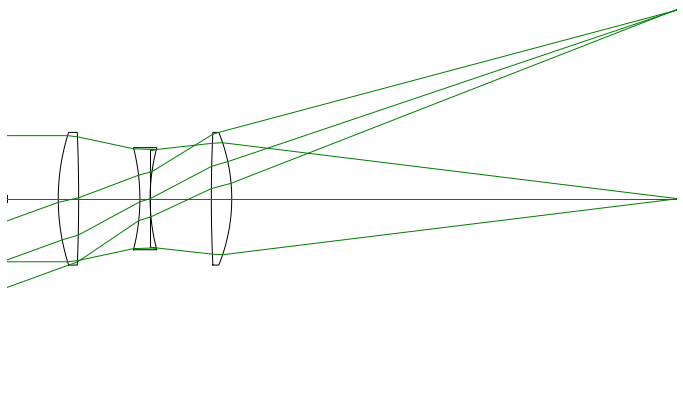

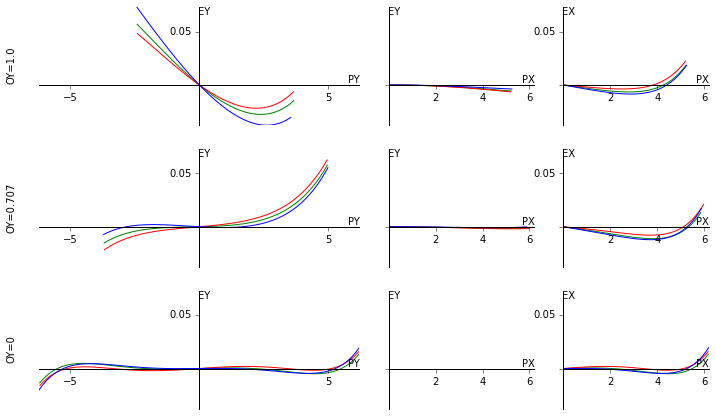

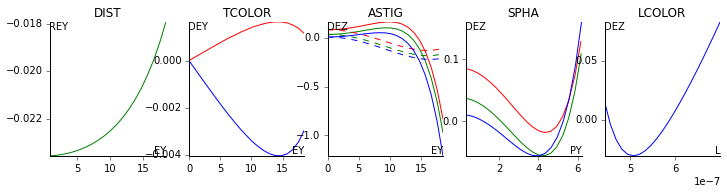

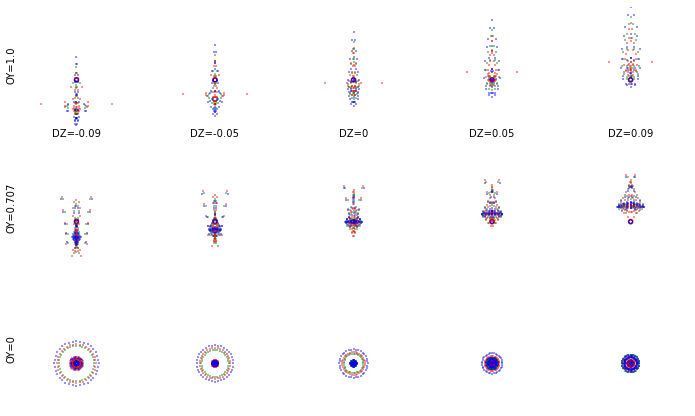

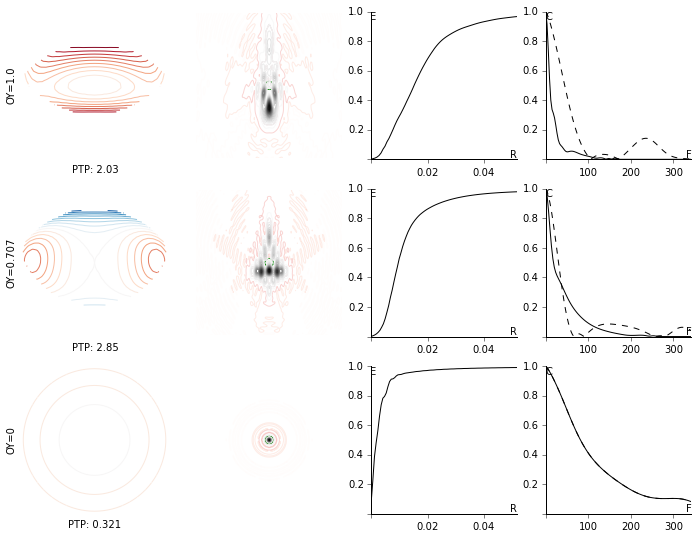

In [3]:
a = Analysis(s, resize=False)

[ 0.318  0.318] (array([ 0.318+0.948j,  0.318+0.948j]), array([ 0.318-0.948j,  0.318-0.948j])) [ True  True] [ True  True]
[[ 0.5    0.5  ]
 [ 0.5    0.5  ]
 [ 0.482  0.482]
 [ 0.383  0.383]
 [ 0.38   0.38 ]
 [ 0.38   0.38 ]
 [ 0.425  0.425]
 [ 0.432  0.432]
 [ 0.019  0.019]]
(array([[ 0.5  ,  0.5  ],
       [ 0.5  ,  0.5  ],
       [ 0.482,  0.482],
       [ 0.383,  0.383],
       [ 0.38 ,  0.38 ],
       [ 0.38 ,  0.38 ],
       [ 0.425,  0.425],
       [ 0.432,  0.432],
       [ 0.019,  0.019]]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))
 # T     track    spot a    spot b  spot ang waistx dz waisty dz   waist x   waist y
 0 S         0       0.5       0.5         0         0         0       0.5       0.5
 1 S         5       0.5       0.5         0      55.5      55.5   0.01281   0.01281
 2 S         7     0.482     0.482         0     29.25     29.25   0.01135   0.01135
 3 S        13    0.3832    0.3832         0     129.5     129.5   0.03922   0.03922
 4 S        14  

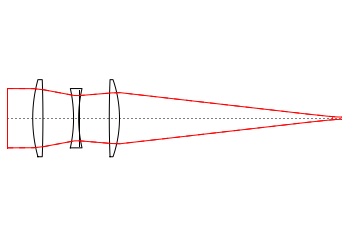

In [4]:
from rayopt import GaussianTrace
s.object = FiniteConjugate(radius=.5)
g = GaussianTrace(s)
g.is_proper()
print(g.m, g.eigenvalues, g.real, g.stable)
g.refocus()
#qi = g.qi[0]
#g.qi[0, 0] *= 2
#qi[0, 1] = qi[1, 0] = 1e-2-1e-5j
#g.rays(qi)
#g.propagate()
#print g.qi[-1]
r = g.spot_radius_at(None)
print(r)
print(g.spot_radius_at(z=None, normal=True))
#print 1/g.qi.real
#print g.eigenmodes
#g.rays(np.eye(2)*g.eigenmodes[0])

g.propagate()
#print g.qi
print(g)
print(g.spot_radius)

fig, ax = plt.subplots()
s.plot(ax)
g.plot(ax, color="red", waist=True, scale=10)
#ax.set_xlim(0, 70)
#ax.set_ylim(-5, .5)
ax.set_aspect("auto")
plt.show()